## Measures of location

Measures of location describe where the center of data lies. They are used to summarize typical behavior in a data set. 

They can be either robust to outliers or not.

### Means

Let x be random variable with $x_1, x_2, ..., x_n$ independent and identically distributed (i.i.d) observations.
* The sample mean: 
$$\hat{x} = \frac{1}{n}\sum_{i=1}^n{x_i}$$
The sample mean estimates the expected value $\mu=E(x)$ of the random variable x.
* The $\alpha$-trimmed mean is robust to outliers, and it is a sample mean after removing $\alpha$ fraction of both smallest and largest observations
* Weighted mean give variable weights for different observations,
$$\sum_{i=1}^n{w_ix_i}$$

where $\sum_{i=1}^n{w_i} = 1$

### Median

Let y_1<y_2..<y_n be ordered observations 

* The sample median is a middle value of ordered observations, and it is robust to outliers
* If there are even number of observations then median is an average of two middle observations
* Sample median approximates population median $m_x$, the value with following property

    $$P(x<m_x)\leq\frac{1}{2}, P(x\leq m_x)\geq\frac{1}{2}$$

### Quantiles

* The sample $\beta$-quantile, $0<\beta<1$, is an observation $y_k$, where $k=\lceil n\beta \rceil$ and n is a number of observations
* Sample $\beta$-quantile estimates population $\beta$-quantile $\beta_x$ with property $$P(x<\beta_x) \leq \beta, P(x \leq \beta_x) \geq \beta$$
* 0.25 and 0.75-quantiles are called first and third quartiles
* mid-hinge is their average and it is robust to outliers: $$\frac{y_{\lceil 0.25 n \rceil} + y_{\lceil 0.75 n \rceil}}{2}$$ 

### Mode

Mode is a value that has highest frequency in the sample. It estimates value of qualitative or discrete quantitative variable that has highest probability. Mostly used with categorical variables

## Measures of scatter

Measures of scatter describes how far away from the center the data lies. They are used to summarize the spread of the data set.


### Variance

* The sample variance: $$s^2 = \frac{1}{1-n}\sum_{i=1}^n{(x_i - \hat{x})^2}$$
* The sample variance estimates population variance $\sigma^2 = E[(x - \mu)^2]$
* The sample standard deviation: $$s = \sqrt{s^2}$$ is often preferred over sample variance because it is measured in the same units as data.

### Median absolute deviation

* The median absolute deviation, MAD, is robust and it is a median of the sample $|x_1-m_x|, |x_2-m_x|...|x_n-m_x|$
* It can be multiplied by the constant 1.4826 to make it consistent estimator of the standard deviation in a normal model.

### Range

The sample range is an interval $[x_{min}, x_{max}]$ and its length is: $$x_{max}-x_{min}$$

### Interquartile range

Interquartile range is robust, and it's a difference between third and first quartile: $$y_{\lceil 0.75 n \rceil} - y_{\lceil 0.25 n \rceil}$$ 
It can be multiplied by a constant 0.7413 to make it a consistent estimator of a standard deviation in a normal model

## Measures of skewness and kurtosis

Skewness describe deviation of the data from symmetry
Kurtosis describes heaviness of the data tails


### Skewness

The sample skewness is $$\hat{\gamma} = \frac{m_3}{s^3}$$, where $$m_3 = \frac{1}{n}\sum_{i=1}^n(x_i-\hat{m})^3$$

Sample skewness coefficient estimates population skewness $$\gamma=E[(\frac{x - \mu}{\sigma})^3]$$

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm, chi2


sample_norm = norm.rvs(loc=5, scale=1, size=1000)
sample_chi_squared = chi2.rvs(df=3, size=1000)

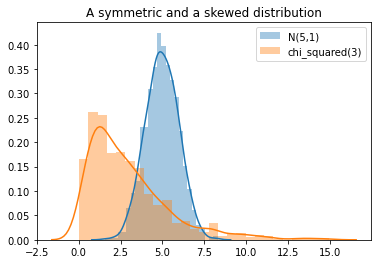

In [22]:
plt.title('A symmetric and a skewed distribution')
sns.distplot(sample_norm, label='N(5,1)')
sns.distplot(sample_chi_squared, label='chi_squared(3)')
plt.legend()

### Interpretation of skewness

* If the skewness coefficient $\hat{\gamma}>0$, then distribution is skewed to the right (positively skewed). I.e. the distribution has long right tail and the mass of distribution is concentrated on the left.
* If the skewness coefficient $\hat{\gamma}<0$, then distribution is skewed to the left (negatively skewed). I.e. the distribution has long left tail and the mass of distribution is concentrated on the right.

### Median skewness

The median skewness $$v_2 = \frac{3(\hat{x} - m_x)}{3}$$

The underlying reasoning is that for symmetrical distributions sample mean and sample estimate the same population value.

The mean and the median in median skewness can be replaced with any two measures of location to obtain different measures of skewness.

### Kurtosis

The sample kurtosis coefficient is $$hat{k} = \frac{m_4}{s^4} - 3$$ where $$m_4 = \frac{1}{n}\sum_{i=1}^n{(x_i - \hat{x})^4}$$

The sample kurtosis coefficient estimates population kurtosis $$k = E[(\frac{x - \mu}{\sigma})^4]-3$$

### Interpretation of kurtosis

* A random variable with normal distribution has kurtosis value of 0
* If kurtosis $k>0$, then the distribution has heavier tails than normal.
* If kurtosis $k<0$, then the distribution has lighter tails than normal.

### Zero kurtosis

Two normal distributions with different parameters will have the same kurtosis

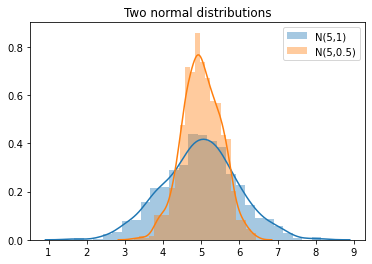

In [2]:
norm1 = norm.rvs(loc=5,scale=1,size=1000)
norm2 = norm.rvs(loc=5,scale=0.5,size=1000)
plt.title('Two normal distributions')
sns.distplot(norm1, label='N(5,1)')
sns.distplot(norm2, label='N(5,0.5)')
plt.legend()

In [3]:
from scipy.stats import kurtosis

In [4]:
kurtosis(norm1), kurtosis(norm2)

(0.05851972514415715, -0.03732798046541275)

## Small and large kurtosis

In [5]:
from scipy.stats import laplace, semicircular

In [9]:
laplace_sample = laplace.rvs(loc=0, scale=3, size=1000)
wigner_sample = semicircular.rvs(scale=4, size=1000)

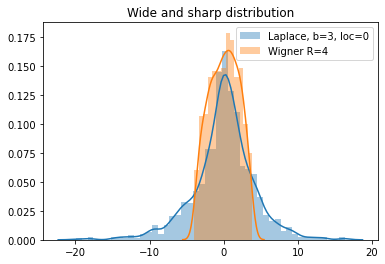

In [10]:
plt.title('Wide and sharp distribution')
sns.distplot(laplace_sample, label='Laplace, b=3, loc=0')
sns.distplot(wigner_sample, label='Wigner R=4')
plt.legend()

In [11]:
kurtosis(laplace_sample)

2.438168467461135

In [12]:
kurtosis(wigner_sample)

-0.9912076142890571

## Descriptive statistics for multivariate data

### Correlation

Let $(x_1,y_1), (x_2, y_2),...,(x_n, y_n)$ be i.i.d observations of a bivariate random variable (x,y)

The sample covariance $$s_{xy} = \frac{1}{n-1}\sum_{i=1}^n{(x_i-\hat{x})(y_i-\hat{y})}$$

Estimates population covariance $\sigma_{xy} = E[(x - E[x])(y - E[y])]$

The sample correlation $$\hat{\rho}(x,y) = \frac{s_{xy}}{s_x s_y} = \frac{\sum_{i=1}^n(x_i-\hat{x})(y_i-\hat{y})}{\sqrt{\sum_{i=1}^n{(x_i-\hat{x})^2}\sum_{i=1}^n{(y_i-\hat{y})^2}}}$$
estimates population correlation $\rho(x,y) = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$

The correlation coefficient measures the linear dependence between two random variables. The coefficient is always in an interval [-1, 1]  

## Descriptive statistics and robustness


In [15]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [16]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
x = df_iris['sepal width (cm)'].values

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

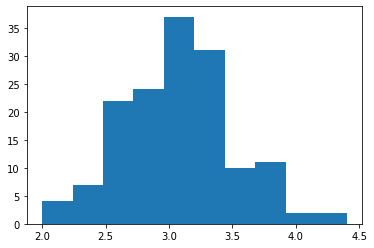

In [39]:
plt.hist(x)

In [19]:
import numpy as np

In [26]:
y = np.append(x[:149], [100])

(array([149.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  2. ,  11.8,  21.6,  31.4,  41.2,  51. ,  60.8,  70.6,  80.4,
         90.2, 100. ]),
 <a list of 10 Patch objects>)

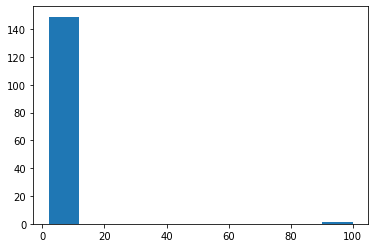

In [37]:
plt.hist(y)

In [29]:
np.random.normal(100, 10, 5)

array([111.57742316, 114.48684817,  89.29372307, 108.95829205,
       113.14394017])

In [30]:
z = np.append(x[:-5], np.random.normal(100, 10, 5))

In [31]:
z.shape

(150,)

In [32]:
y.shape

(150,)

(array([145.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   3.,   1.]),
 array([  2.        ,  14.15031444,  26.30062889,  38.45094333,
         50.60125778,  62.75157222,  74.90188667,  87.05220111,
         99.20251555, 111.35283   , 123.50314444]),
 <a list of 10 Patch objects>)

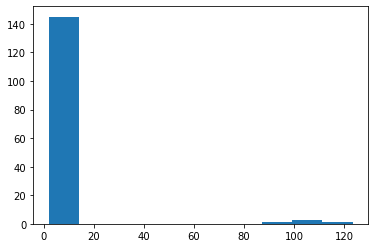

In [35]:
plt.hist(z)

### Location

In [41]:
np.mean(x), np.mean(y), np.mean(z)

(3.0573333333333337, 3.704, 6.518642208557261)

In [42]:
from scipy.stats import trim_mean

trim_mean(x, 0.2), trim_mean(y, 0.2), trim_mean(z, 0.2)

(3.0399999999999996, 3.0444444444444443, 3.0611111111111104)

In [43]:
np.median(x), np.median(y),  np.median(z)

(3.0, 3.0, 3.0)

In [48]:
def mid_hinge(x):
    return (np.quantile(x, 0.25)+np.quantile(x, 0.75))/2

In [49]:
mid_hinge(x), mid_hinge(y), mid_hinge(z)

(3.05, 3.0875, 3.0999999999999996)

### Scatter

In [50]:
np.std(x), np.std(y), np.std(z)

(0.4344109677354946, 7.900825948384553, 18.71408979793975)

In [54]:
from scipy.stats import median_abs_deviation as mad

In [55]:
mad(x), mad(y), mad(z)

(0.2999999999999998, 0.2999999999999998, 0.2999999999999998)

In [56]:
def range_(x):
    return np.max(x) - np.min(x)

In [57]:
range_(x), range_(y), range_(z)

(2.4000000000000004, 98.0, 121.50314444199313)

In [58]:
from scipy.stats import iqr

iqr(x), iqr(y), iqr(z)

(0.5, 0.5750000000000002, 0.6000000000000001)

In [59]:
from scipy.stats import skew
skew(x), skew(y), skew(z)

(0.31576710633893473, 12.06900920344008, 5.271373108094736)

In [60]:
def median_skew(x):
    return (np.mean(x) - np.median(x))/np.std(x)

In [61]:
median_skew(x), median_skew(y), median_skew(z)

(0.13197947932162468, 0.0891046081256788, 0.1880210176689775)

### Kurtosis

In [62]:
kurtosis(x), kurtosis(y), kurtosis(z)

(0.18097631752246768, 144.11341522752747, 26.099349422481993)

### Correlation

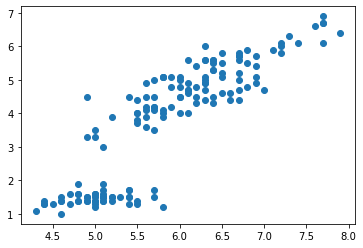

In [64]:
x1 = df_iris['sepal length (cm)']
x2 = df_iris['petal length (cm)']

plt.scatter(x1, x2)

In [65]:
np.corrcoef(x1, x2)

array([[1.        , 0.87175378],
       [0.87175378, 1.        ]])

Text(0, 0.5, 'Petal length (cm)')

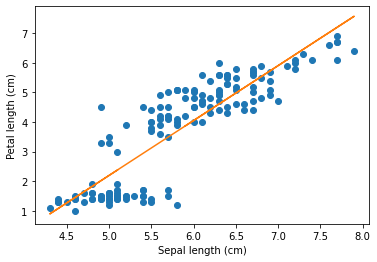

In [69]:
slope, intercept = np.polyfit(x1, x2, 1)
plt.plot(x1,x2, 'o')
plt.plot(x1, x1*slope+intercept)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')